### The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. 

Features:
 - CRIM - per capita crime rate by town
 - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS - proportion of non-retail business acres per town.
 - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 - NOX - nitric oxides concentration (parts per 10 million)
 - RM - average number of rooms per dwelling
 - AGE - proportion of owner-occupied units built prior to 1940
 - DIS - weighted distances to five Boston employment centres
 - RAD - index of accessibility to radial highways
 - TAX - full-value property-tax rate per $10,000
 - PTRATIO - pupil-teacher ratio by town
 - B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT - % lower status of the population

Target:
 - MEDV - Median value of owner-occupied homes in $1000's
 
This dataset will be used to practice regression techniques using supervised learning ML algorithms.

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

**Load in dataset**

In [2]:
cols=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv('..\datasets\housing.csv',sep=' ',skipinitialspace=True,header=None,names=cols)

**Exploratory data analysis**

In [3]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Starting with **Univariate data analysis**

Let's first explore the categorical features (CHAS and RAD) 

In [8]:
# present value counts and proportions for CHAS and RAD
pd.options.display.float_format = "{:,.2f}".format

RAD_counts = pd.DataFrame(df['RAD'].value_counts()).rename({'RAD':'RAD counts'}).sort_index()
RAD_counts['RAD %s'] = RAD_counts.apply(lambda x: x/sum(x))

CHAS_counts = pd.DataFrame(df['CHAS'].value_counts()).rename({'CHAS':'CHAS counts'}).sort_index()
CHAS_counts['CHAS %s'] = CHAS_counts.apply(lambda x: x/sum(x))

print(RAD_counts)
print("")
print(CHAS_counts)

    RAD  RAD %s
1    20    0.04
2    24    0.05
3    38    0.08
4   110    0.22
5   115    0.23
6    26    0.05
7    17    0.03
8    24    0.05
24  132    0.26

   CHAS  CHAS %s
0   471     0.93
1    35     0.07


Now let's investigate the quantitative features

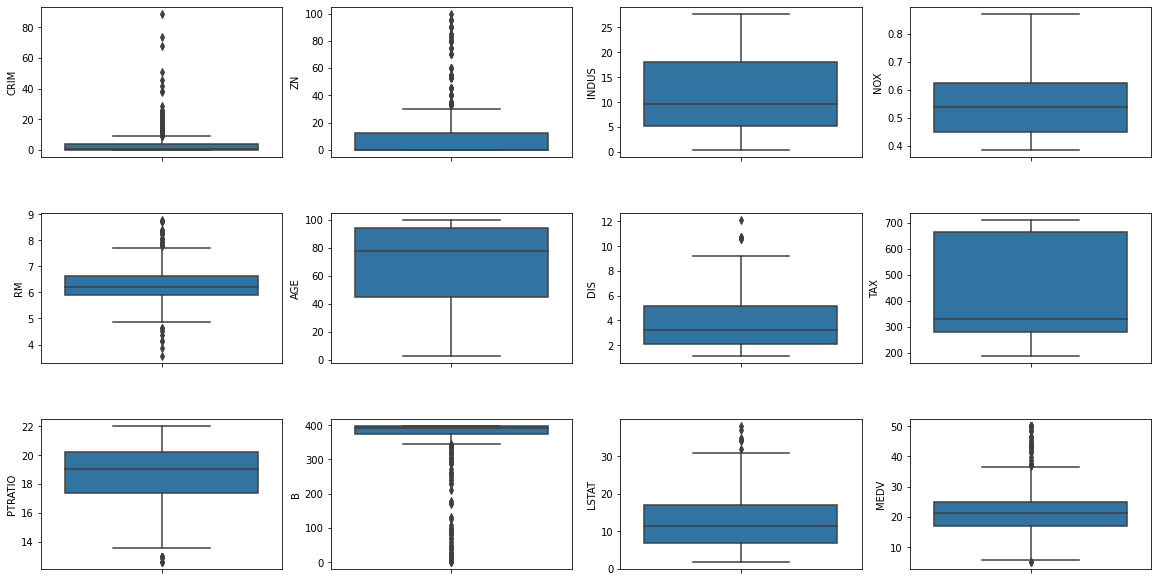

In [9]:
# we can use boxplots to explore distribution of quantitative data
quan_features = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT','MEDV']

fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(16,8))
index=0
axes = axes.flatten()
for k,v in df[quan_features].items():
    sns.boxplot(y=k,data=df,ax=axes[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

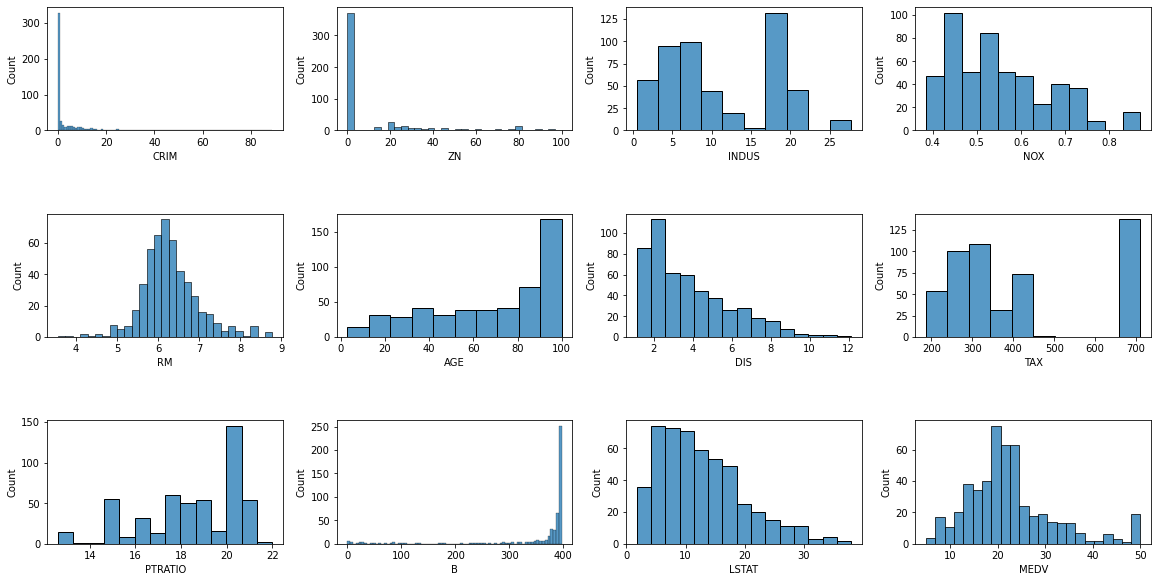

In [10]:
# histograms can also be used
fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(16,8))
index=0
axes = axes.flatten()
for k,v in df[quan_features].items():
    sns.histplot(data=df[quan_features],x=k,ax=axes[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

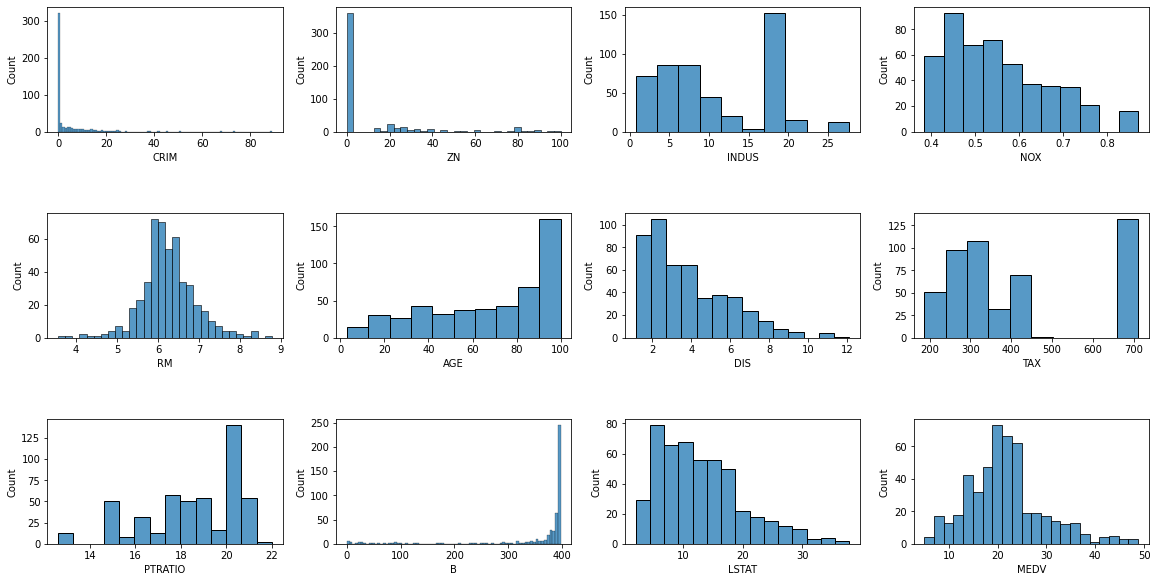

In [11]:
# drop the censored data in MEDV (MEDV = 50) and put data into a new dataframe
quan_df = df[quan_features][df['MEDV'] != 50].copy()

# repeat the histogram exercise
fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(16,8))
index=0
axes = axes.flatten()
for k,v in quan_df.items():
    sns.histplot(data=quan_df,x=k,ax=axes[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Moving on to **Multivariate data analysis**

Let's explore relationships between our features and between the features and the target

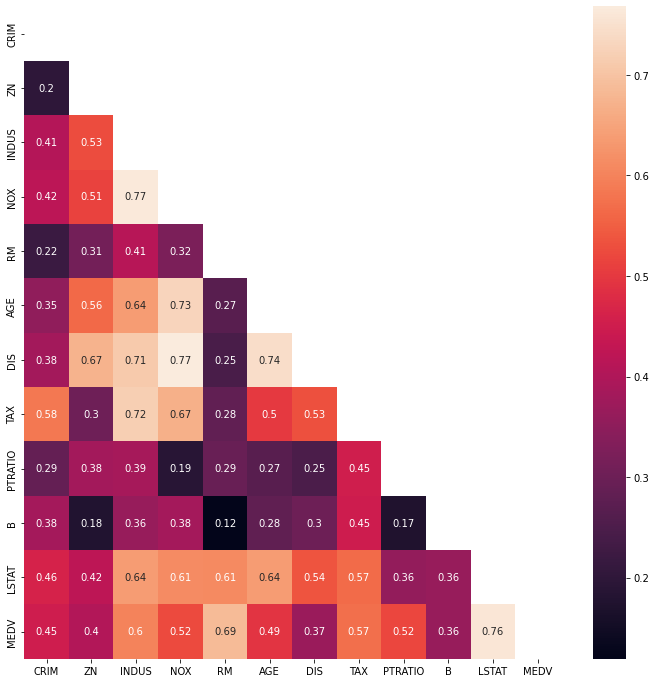

In [12]:
# plot a heatmap to see correlation coefficients between the different variables and the target
# use the abs() method so we can ignore the direction in the correlation for now
plt.figure(figsize=(12,12))
sns.heatmap(quan_df.corr().abs(),annot=True,mask=np.triu(quan_df.corr()));

From the above figure, we can see that INDUS, RM, TAX, PTRATIO and LSTAT are all have strong (above 0.5) correlation coefficients with the target MEDV 

The best performers are RM (0.69) and LSTAT (0.76)

The scatter plots in the below figure provide further evidence for this 

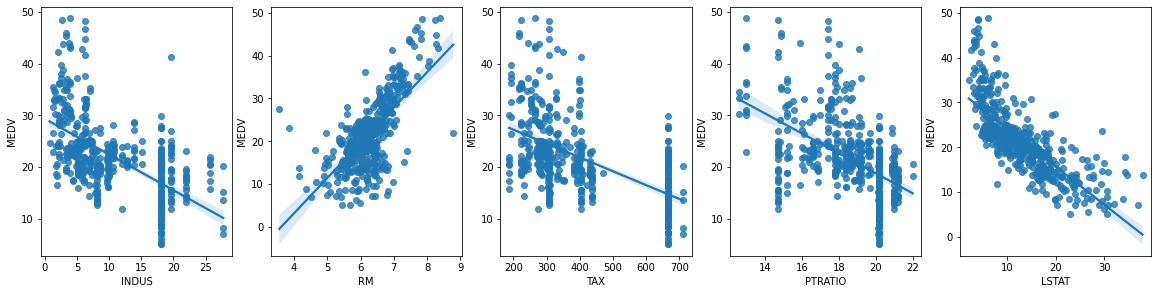

In [13]:
# generate scatter plots of the relationship between each of the selected features and the target
fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(16,4))
sel_cols = ['INDUS','RM','TAX','PTRATIO','LSTAT']
for idx,col in enumerate(sel_cols):
    sns.regplot(x=quan_df[col],y=quan_df['MEDV'],ax=axes[idx])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)